## 22MCA1072
## Harsh Yadav

# 1. Load the salary dataset to working environment.

In [4]:
# importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv('position_salaries.csv')

In [6]:
data.head()

,Position,Years of Experience,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## 2. Perform  exploratory  analysis  on  the  loaded  dataset  and  draw  your inferences.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Position             10 non-null     object
 1   Years of Experience  10 non-null     int64 
 2   Salary               10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
data.describe()

,Years of Experience,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [9]:
data.isnull().sum()

Position               0
Years of Experience    0
Salary                 0
dtype: int64

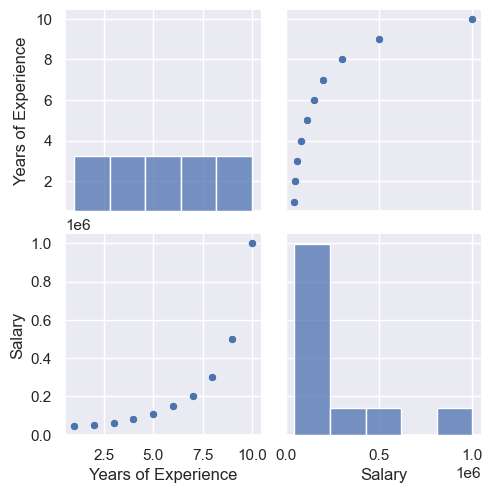

In [10]:
sns.pairplot(data)

from the above observations, we can conclude that the relationship between salary and year of experience is non-linear

### Feature Engineering--

In [11]:
data.head()

,Position,Years of Experience,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


- Position is a categorical variable

In [12]:
data['Position'].value_counts()

Business Analyst     1
Junior Consultant    1
Senior Consultant    1
Manager              1
Country Manager      1
Region Manager       1
Partner              1
Senior Partner       1
C-level              1
CEO                  1
Name: Position, dtype: int64

Position is an ordinal categorical variable, therefore can be encoded.

In [13]:
# from sklearn.preprocessing import OrdinalEncoder

## 3. Apply LinearRegression and design a model on the training data.

In [14]:
X = data.drop(['Position', 'Salary'],
              axis=1)

y = data['Salary']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [17]:
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

82607.75862068967

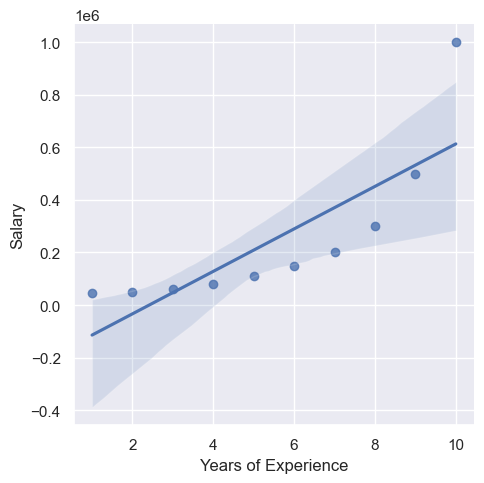

In [19]:
sns.lmplot(x = 'Years of Experience',
           y = 'Salary',
           data = data,)

## 4. Apply PolynomialRegression by manual method and design a model on the training data.

In [20]:
import math

In [21]:
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) : # constructor
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
         
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     
    # function to normalize X_transform
     
    def normalize( self, X ) :
         
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
        return X
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
     
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
        # normalize X_transform
         
        X_normalize = self.normalize( X_transform )
                 
        # gradient descent learning
     
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = h - self.Y
             
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
         
        return self
     
    # predict
     
    def predict( self, X ) :
        X_transform = self.transform( X )
         
        X_normalize = self.normalize( X_transform )
         
        return np.dot( X_transform, self.W )

In [22]:
X = data.iloc[:, 1:2].values
y = data['Salary']

In [23]:
pr = PolynomailRegression(degree=4, 
                          learning_rate=0.01,
                          iterations=500)

In [24]:
pr.fit(X, y)

## 5. Fit the created model on the test databy manual method.

In [25]:
y_pred = pr.predict(X)

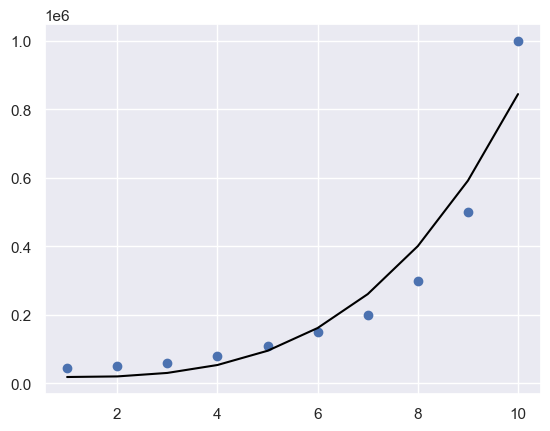

In [26]:
plt.plot(X, y_pred, c = 'black')
plt.scatter(X, y)

In [27]:
mean_absolute_error(y, y_pred)

54728.34013561573

## 6. Apply PolynomialRegression using the python  library and  design  a model on the training data. 

In [28]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures()
X_poly = pf.fit_transform(X)

In [35]:
lr1 = LinearRegression().fit(X_poly, y)

In [30]:
y_pred = lr1.predict(X_poly)

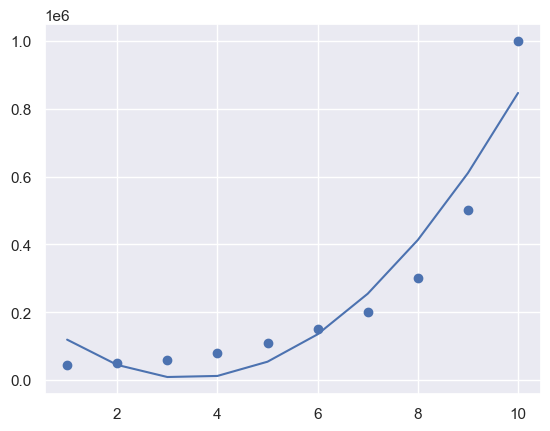

In [31]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [32]:
mean_absolute_error(y, y_pred)

70218.1818181819